In [41]:
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
import numpy as np
import obspy
import netCDF4 as nc

In [42]:
import plots

In [43]:
%load_ext autoreload

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [49]:
st = obspy.read('../../../Projects/SHARP/splitting/shebapy_test/MONM/GB_MONM_20180420145936.HH?')
st_corr = obspy.read('../../../Projects/SHARP/splitting/shebapy_test/MONM/GB_MONM_20180420145936_corr.HH?')
result = nc.Dataset('/Users/eart0593/Projects/SHARP/splitting/shebapy_test/MONM/GB_MONM_20180420145936_sheba_result.nc')
for tr in st_corr:
    tr.stats.sac['a'] = result.wbeg
    tr.stats.sac['f'] = result.wend
result


<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF3_CLASSIC data model, file format NETCDF3):
    title: SHEBA splitting result
    zdate: 2018110
    ztime: 145936.440
    evla: 51.912
    evlo: -2.935
    evdp: 20.7
    station:     MONM
    stla: 51.83916
    stlo: -2.80417
    gcarc: 0.10898658
    dist: 12.118754
    az: 131.91997
    baz: 312.0229
    tlag: 0.36749998
    dtlag: 0.0031249998
    fast: -65.0
    dfast: 6.0
    spol: 96.41211
    dspol: 2.7014167
    tlagXC: 0.012499999
    dtlagXC: 0.0025
    fastXC: -76.0
    dfastXC: 9.5
    wbeg: 7.1566663
    wend: 7.5899997
    snr: 6.427818
    eigrat_orig: 0.42564616
    eigrat_corr: 0.052987985
    ndf: 27
    best_window: 97
    best_cluster: 1
    qfactor: -0.0
    intensity_estimated: -0.2220664
    intensity: -0.03131743
    dimensions(sizes): search_tlag(161), search_fast(181), window(100), cluster(6)
    variables(dimensions): float32 mw_wbeg(window), float32 mw_wend(window), float32 mw_tlag(window), float32 mw_dt

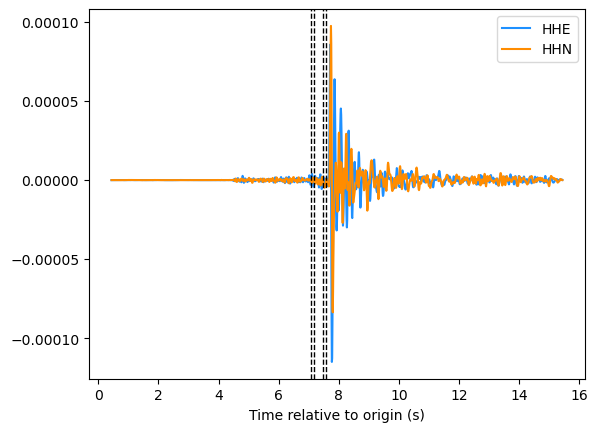

In [50]:
plots._plot_traces(st, show_window_range=True)

/var/folders/29/f17bmxr12kl590498334yprw0000gq/T/ipykernel_41743/628816936.py:24: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
/var/folders/29/f17bmxr12kl590498334yprw0000gq/T/ipykernel_41743/628816936.py:25: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


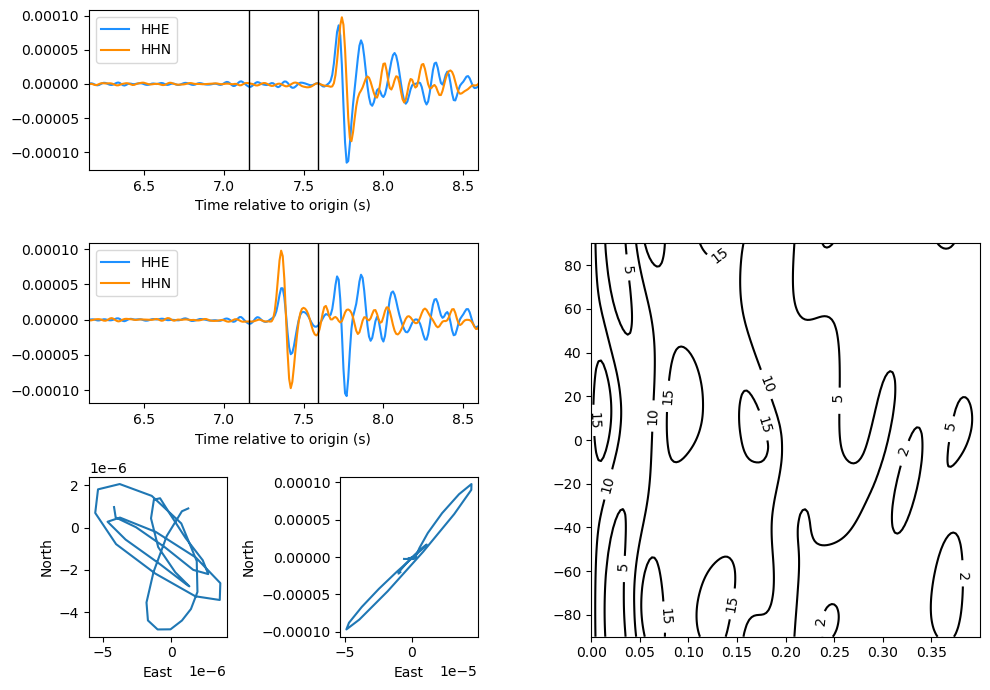

In [51]:
fig = plt.figure(layout="constrained", figsize= (10,7))

gs = GridSpec(3, 4, figure=fig)

ax1 = fig.add_subplot(gs[0,0:2])
plots._plot_traces(st, show_final_window=True, axes=ax1)
ax1.set_xlim([result.wbeg -1, result.wend + 1])
ax2 = fig.add_subplot(gs[1,0:2])
plots._plot_traces(st_corr, show_final_window=True, axes=ax2)
ax2.set_xlim([result.wbeg -1, result.wend + 1])
ax3 = fig.add_subplot(gs[2, 0])
plots._ppm(ax3, st, result.wbeg, result.wend)
ax4 = fig.add_subplot(gs[2, 1])
plots._ppm(ax4, st_corr, result.wbeg, result.wend)
ax4 = fig.add_subplot(gs[1:3, 2:4])
phis = result.variables['fast_vector'][:]
dts = result.variables['tlag_vector'][:]
PHI, TLAG = np.meshgrid(phis, dts)

C = ax4.contour(TLAG, PHI, result.variables['lam2_norm_grid'][:]/ result.variables['lam2_norm_grid'][:].min(), colors='black', levels=[1, 2, 5, 10, 15],
            linewidths = [3, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5])
ax4.clabel(C, C.levels, fmt ='%2i')

plt.tight_layout()
fig.show()

In [47]:
plots.plot_traces(obspy.read('../../../Projects/SHARP/splitting/shebapy_test/MONM/GB_MONM_20180224053715.HH?'), show_final_window=True)

AttributeError: module 'plots' has no attribute 'plot_traces'

In [ ]:
st[0].stats.sac['t2']

5.83

In [ ]:
st[0].stats.sac['user0']

5.58

In [ ]:
st_corr[0].stats.channel = 'HHE'
st_corr[1].stats.channel = 'HHN'

In [ ]:
st_corr

3 Trace(s) in Stream:
GB.MONM.00.HHE | 2018-02-24T05:37:15.150000Z - 2018-02-24T05:37:30.150000Z | 100.0 Hz, 1501 samples
GB.MONM.00.HHN | 2018-02-24T05:37:15.150000Z - 2018-02-24T05:37:30.150000Z | 100.0 Hz, 1501 samples
GB.MONM.00.HHZ | 2018-02-24T05:37:15.150000Z - 2018-02-24T05:37:30.150000Z | 100.0 Hz, 1501 samples

In [ ]:
print(result.wbeg, result.wend)

5.58 9.718889


In [ ]:
result.variables['tlag_vector'][:]

masked_array(data=[0.        , 0.0025    , 0.005     , 0.0075    ,
                   0.01      , 0.0125    , 0.015     , 0.0175    ,
                   0.02      , 0.0225    , 0.025     , 0.0275    ,
                   0.03      , 0.0325    , 0.035     , 0.0375    ,
                   0.04      , 0.0425    , 0.045     , 0.0475    ,
                   0.05      , 0.0525    , 0.055     , 0.0575    ,
                   0.06      , 0.0625    , 0.065     , 0.0675    ,
                   0.07      , 0.0725    , 0.075     , 0.0775    ,
                   0.08      , 0.0825    , 0.085     , 0.0875    ,
                   0.09      , 0.0925    , 0.095     , 0.0975    ,
                   0.09999999, 0.1025    , 0.105     , 0.10749999,
                   0.11      , 0.1125    , 0.11499999, 0.1175    ,
                   0.12      , 0.12249999, 0.125     , 0.1275    ,
                   0.13      , 0.1325    , 0.13499999, 0.1375    ,
                   0.14      , 0.1425    , 0.145     , 0.1475 

In [ ]:
result

<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF3_CLASSIC data model, file format NETCDF3):
    title: SHEBA splitting result
    zdate: 2018055
    ztime: 053715.150
    evla: 51.816
    evlo: -2.933
    evdp: 11.6
    station:     MONM
    stla: 51.83916
    stlo: -2.80417
    gcarc: 0.0831693
    dist: 9.248004
    az: 73.77024
    baz: 253.87152
    tlag: 0.39749998
    dtlag: 0.0031249998
    fast: -42.0
    dfast: 9.25
    spol: 134.37779
    dspol: 15.728984
    tlagXC: 0.022499999
    dtlagXC: 0.000625
    fastXC: -48.0
    dfastXC: 4.0
    wbeg: 5.58
    wend: 9.718889
    snr: 7.425574
    eigrat_orig: 0.4211245
    eigrat_corr: 0.28211167
    ndf: 75
    best_window: 71
    best_cluster: 1
    qfactor: -0.0
    intensity_estimated: -0.050125655
    intensity: -0.013513625
    dimensions(sizes): search_tlag(161), search_fast(181), window(100), cluster(6)
    variables(dimensions): float32 mw_wbeg(window), float32 mw_wend(window), float32 mw_tlag(window), float32 mw_dtlag